In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

C:\Users\mikex\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['TSLA']
data = pd.DataFrame()
start_date = '2016-1-1'
for t in tickers:
    data[t] = wb.DataReader(t,data_source='yahoo', start=start_date)['Adj Close']

In [6]:
log_returns = np.log(1+data.pct_change())
log_returns.tail()

,TSLA
Date,
2020-09-09,0.103669
2020-09-10,0.013720
2020-09-11,0.003709
2020-09-14,0.118522
2020-09-15,0.069365


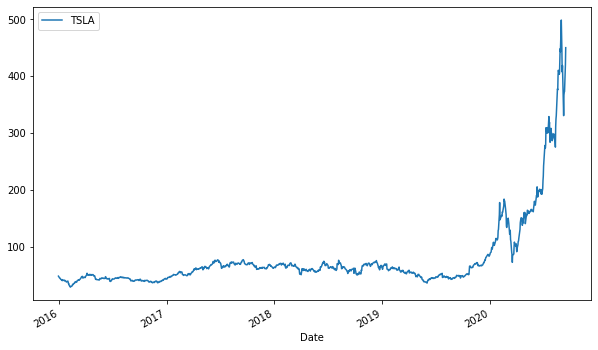

In [7]:
data.plot(figsize=(10,6))

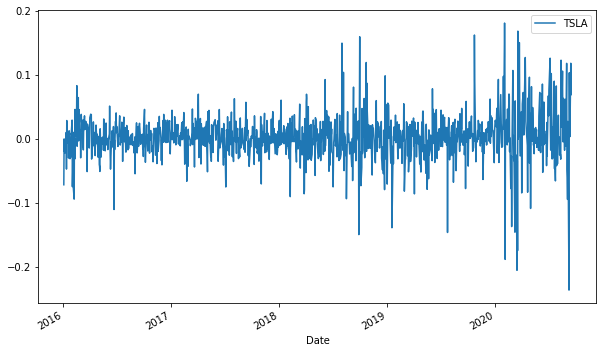

In [8]:
log_returns.plot(figsize=(10,6))

In [9]:
u = log_returns.mean()
u

TSLA    0.00189
dtype: float64

In [10]:
var = log_returns.var()
var

TSLA    0.001317
dtype: float64

In [11]:
drift = u - (0.5*var)
drift

TSLA    0.001231
dtype: float64

In [12]:
stdev = log_returns.std()
stdev

TSLA    0.036287
dtype: float64

In [13]:
np.array(drift)

array([0.00123139])

In [14]:
drift.values

array([0.00123139])

In [15]:
stdev.values

array([0.03628694])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
x = np.random.rand(10,2)

In [18]:
x

array([[0.22162962, 0.49563309],
       [0.16836453, 0.828167  ],
       [0.20374492, 0.34687562],
       [0.47542782, 0.27388741],
       [0.60015726, 0.17650493],
       [0.27418833, 0.20663056],
       [0.34891274, 0.91210769],
       [0.51189292, 0.97014383],
       [0.48893489, 0.75381276],
       [0.04066543, 0.7895614 ]])

In [19]:
 norm.ppf(x)

array([[-0.76670111, -0.01094645],
       [-0.96064826,  0.94694659],
       [-0.82831904, -0.39376949],
       [-0.06163233, -0.60109784],
       [ 0.25375416, -0.92876698],
       [-0.60019444, -0.81816827],
       [-0.38825751,  1.3538488 ],
       [ 0.02981555,  1.88291171],
       [-0.02773967,  0.68653711],
       [-1.74301576,  0.80490032]])

In [21]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 1.13336921, -0.03016082],
       [-1.74027907,  0.35956267],
       [-0.77640085, -0.57075664],
       [-0.89943782, -0.64827653],
       [-0.4336798 , -0.48161111],
       [ 0.40590523, -0.78913194],
       [ 0.21248974, -0.43887437],
       [ 0.84331092, -2.53906906],
       [ 0.53168317, -0.50456408],
       [-1.55598692,  3.27033382]])

In [22]:
t_intervals = 1000
iterations = 10 

In [23]:
daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.00026691, 1.02098662, 0.95746231, ..., 0.96807129, 1.04684234,
        0.99898731],
       [0.98731808, 0.99396366, 0.94813085, ..., 1.03144033, 1.00284916,
        0.96658832],
       [1.01249827, 1.02277878, 0.97509855, ..., 0.97510791, 1.00424724,
        1.02083246],
       ...,
       [1.02743758, 0.92455057, 1.06591096, ..., 0.97835515, 1.06741078,
        0.99433242],
       [1.0233855 , 1.05023973, 0.96076369, ..., 1.0211915 , 1.00040406,
        0.97870845],
       [1.03542795, 1.04158131, 1.02589747, ..., 0.99537458, 0.95508404,
        1.03181698]])

In [24]:
S0 = data.iloc[-1]
S0

TSLA    449.76001
Name: 2020-09-15 00:00:00, dtype: float64

In [25]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0] = S0
price_list

array([[449.76000977, 449.76000977, 449.76000977, ..., 449.76000977,
        449.76000977, 449.76000977],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [27]:
for t in range(1,t_intervals):
    price_list[t]= price_list[t-1]*daily_returns[t]
price_list

array([[  449.76000977,   449.76000977,   449.76000977, ...,
          449.76000977,   449.76000977,   449.76000977],
       [  444.05619077,   447.04510464,   426.43133904, ...,
          463.9006114 ,   451.04144876,   434.73277355],
       [  449.60612611,   457.22824644,   415.81258044, ...,
          452.3531566 ,   452.95713169,   443.78932822],
       ...,
       [11321.89884002,  1057.87595009,  1714.09168931, ...,
         2756.98807821,  3317.5988759 ,  1977.8735656 ],
       [11586.66706649,  1111.02334938,  1646.83705511, ...,
         2815.41280063,  3318.93938638,  1935.76156478],
       [11997.15890261,  1157.22115455,  1689.48596991, ...,
         2802.39033829,  3169.86604616,  1997.35165191]])

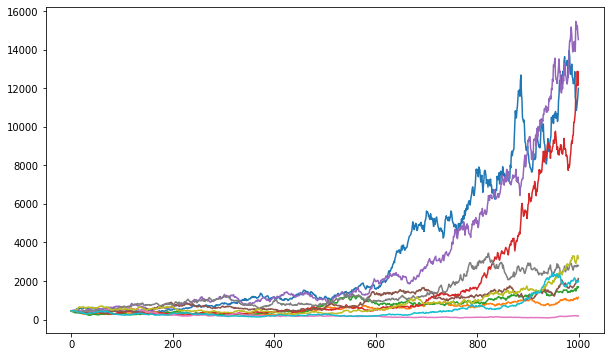

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list)